In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats, integrate
import statsmodels.api as sm
%matplotlib inline

In [39]:
btc_df_1 = pd.read_csv('C:/Users/Thomas/Desktop/Bitcoin_Data/Version_1/btcFeature.csv')

In [40]:
shift = -1
random_state = 0
btc_df_1.Change = btc_df_1.Change.shift(shift)
btc_df_1 = btc_df_1.dropna()

In [41]:
btc_df_1.head(2)

,Unnamed: 0,Change,NoOfTweets,Price,Sentiment,TimeStamp,Volume
0,0,160.020423,5467,10895.972636,0.129824,1517006461,101879.724252
1,0,15.984359,5126,11087.754289,0.164874,1517010061,102390.922041


In [42]:
targets = pd.DataFrame(btc_df_1, columns=["Change"])

In [43]:
X = btc_df_1[["NoOfTweets","Sentiment","Volume"]] #chose three variables (one of which is a dummy variable)
y = targets["Change"]
X = sm.add_constant(X) #add intercept

In [44]:
model = sm.OLS(y, X).fit() 
predictions = model.predict(X)

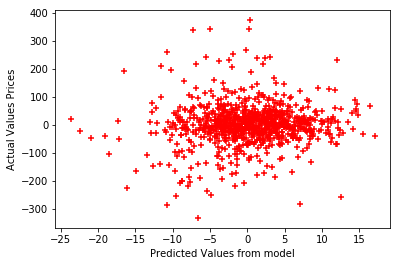

MSE: 9689.54613378


In [45]:
plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicted Values from model")
plt.ylabel("Actual Values Prices")
plt.show()
print("MSE:", model.mse_model)